<a href="https://colab.research.google.com/github/JanuaSandie05/Janua/blob/main/PYTN_Prakerja_%3Cjanua_sandie%3E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [253]:
# import package
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use(["ggplot"])

# sklearn classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# encoding
from sklearn.preprocessing import LabelEncoder

In [254]:
# import data menggunakan data heart dari https://raw.githubusercontent.com/stefkwan-h8/dataset/main/heart.csv 
df_heart = pd.read_csv("https://raw.githubusercontent.com/stefkwan-h8/dataset/main/heart.csv")
df_heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [255]:
df_heart.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [256]:
#drop columns yang tidak dipakai
df_heart.drop(columns=['thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal'], inplace=True)

In [257]:
df_heart

,age,sex,cp,trestbps,chol,fbs,restecg,target
0,52,1,0,125,212,0,1,0
1,53,1,0,140,203,1,0,0
2,70,1,0,145,174,0,1,0
3,61,1,0,148,203,0,1,0
4,62,0,0,138,294,1,1,0
...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,1
1021,60,1,0,125,258,0,0,0
1022,47,1,0,110,275,0,0,0
1023,50,0,0,110,254,0,0,1


In [258]:
#mengubah nama target menjadi klasifikasi
df_heart.rename(columns={"target": "klasifikasi"}, inplace=True)

In [259]:
#mengecek data columns
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   age          1025 non-null   int64
 1   sex          1025 non-null   int64
 2   cp           1025 non-null   int64
 3   trestbps     1025 non-null   int64
 4   chol         1025 non-null   int64
 5   fbs          1025 non-null   int64
 6   restecg      1025 non-null   int64
 7   klasifikasi  1025 non-null   int64
dtypes: int64(8)
memory usage: 64.2 KB


In [260]:
df_heart["klasifikasi"].value_counts()

1    526
0    499
Name: klasifikasi, dtype: int64

In [261]:
#menggolongkan bagian fitur dan target
fitur = df_heart[["age", "sex", "cp"]]
target = df_heart["klasifikasi"]

print(fitur, fitur.shape)
print(target, target.shape)

      age  sex  cp
0      52    1   0
1      53    1   0
2      70    1   0
3      61    1   0
4      62    0   0
...   ...  ...  ..
1020   59    1   1
1021   60    1   0
1022   47    1   0
1023   50    0   0
1024   54    1   0

[1025 rows x 3 columns] (1025, 3)
0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: klasifikasi, Length: 1025, dtype: int64 (1025,)


In [262]:
model = LogisticRegression(solver="newton-cg")
model.fit(fitur, target)

LogisticRegression(solver='newton-cg')

In [263]:
#saya ingin memprediksi usia 47th dengan sex 1, dan cp 0
model.predict([[47,1,0]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


array([0])

In [264]:
print(classification_report(target, model.predict(fitur)))

              precision    recall  f1-score   support

           0       0.75      0.77      0.76       499
           1       0.77      0.75      0.76       526

    accuracy                           0.76      1025
   macro avg       0.76      0.76      0.76      1025
weighted avg       0.76      0.76      0.76      1025



Hasil keakuratan prediksi memiliki keakuratan rata-rata 0.75 hingga 0.76

In [265]:
confusion_matrix(target, model.predict(fitur))

array([[382, 117],
       [130, 396]])

pada bagian ini saya mendapatkan 2 baris

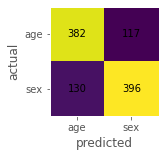

In [266]:
#menggunakan Confusion matrix untuk visualisasi

cm = confusion_matrix(target, model.predict(fitur))

fig, ax = plt.subplots(figsize=(2,2))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), 
    ticklabels=('age','sex'))
ax.yaxis.set(ticks=(0, 1), 
    ticklabels=('age','sex'))
ax.set_xlabel("predicted")
ax.set_ylabel("actual")
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='black')
plt.show()

Kesimpulannya adalah prediksi dibagian age dapat meprediksi dengan benar 382 dan salah sebanyak 117. Sedangkan pada bagian sex prediksi bbenar 396 dan 130 salah.

Dengan menggunakan logistic regression sebagai machhine learning pada kasus kali ini cukup akurat dengan tingkat keakuratan hingga 0,76. Sehingga, Logistic Regression sangat direkomendasikan untuk membuat prediksi-prediksi pada data heart disease.